In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, warnings
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
pd.options.display.max_columns=100

In [2]:
df=pd.read_csv(r"A:\datasets\CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
dict_name={}
j=1
for i in df['name'].unique().tolist():
    dict_name[i]=j
    j+=1
df['name_en']=df['name'].map(dict_name)

dict_seller={'Individual':1,'Dealer':2,'Trustmark Dealer':3}
df['seller_type_en']=df['seller_type'].map(dict_seller)
df.drop('seller_type',axis=1,inplace=True)

dict_trans={'Manual':1,'Automatic':2}
df['transmission_en']=df['transmission'].map(dict_trans)
df.drop('transmission',axis=1,inplace=True)

dict_owner={'First Owner':1,'Second Owner':2, 'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':0}
df['owner_en']=df['owner'].map(dict_owner)
df.drop(['owner','name'],axis=1,inplace=True)

dict_fuel={'Diesel':1,'Petrol':2,'LPG':3, 'CNG':4, 'Electric':5}
df['fuel_en']=df['fuel'].map(dict_fuel)
df.drop('fuel',axis=1,inplace=True)

In [4]:
df.head()

,year,selling_price,km_driven,name_en,seller_type_en,transmission_en,owner_en,fuel_en
0,2007,60000,70000,1,1,1,1,2
1,2007,135000,50000,2,1,1,1,2
2,2012,600000,100000,3,1,1,1,1
3,2017,250000,46000,4,1,1,1,2
4,2014,450000,141000,5,1,1,2,1


100%|██████████| 200/200 [00:01<00:00, 187.89it/s]


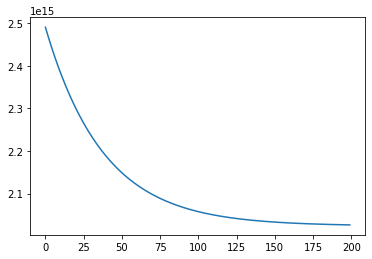

In [5]:
A = df.drop('selling_price',axis=1) #input
y = df[['selling_price']] #output
x = np.random.random((7,1)) #parameters
c = np.random.random() #y intercept
lr = 0.000000000001 #learning rate

costs = []
for i in tqdm(range(200)):
    prediction = np.dot(A,x)
    loss = y-prediction
    cost = np.sum((prediction-y)**2)
    costs.append(cost)
    gradient = 2*np.dot(A.T,loss)/df.shape[0]
    x=x-lr*-gradient
plt.plot(range(200),costs)

In [6]:
prediction=np.dot(A,x)
len(prediction)

4340

In [7]:
df.shape

(4340, 8)

In [8]:
costs[-1][0]

2026575291671920.0

In [9]:
costs[-1][0]

2026575291671920.0

In [10]:
np.dot(A.iloc[0].values,x)

array([281347.4673326])

In [11]:
def cost_function(prediction,y,sample_size):
    return np.sqrt(np.sum((prediction-y)**2)/sample_size)

lr=LinearRegression(n_jobs=-1)
lr.fit(A,y)
lr.predict([A.iloc[0].values])

array([[57159.59291059]])

In [12]:
[cost_function(np.dot(A,x),y,A.shape[0])[0], cost_function(lr.predict(A),y,A.shape[0])[0] ]

[683328.2040167772, 429036.34051936114]

#### Applying Linear Regression for prediction of Weight w.r.t to Height

In [13]:
df=pd.read_csv(r"C:\Users\Akarsh.B.A\Desktop\Karunadu internship\projects2022\LinearRegression\Heightweightpredictor\weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [14]:
print(df.shape)
df.drop('Gender',inplace=True,axis=1)
print(df.shape)

(10000, 3)
(10000, 2)


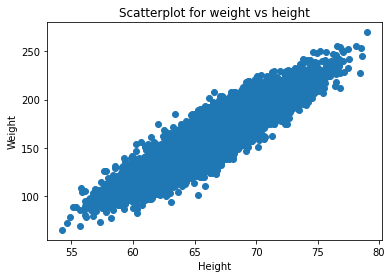

In [15]:
from sklearn import linear_model
input = df.drop('Weight',axis=1)
output = df.drop('Height',axis=1)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Scatterplot for weight vs height')
plt.scatter(input,output)
plt.show()

In [16]:
model=linear_model.LinearRegression()
model.fit(input,output)
model_result=model.predict([[80]])
print(model.score(input,output))
print(model.coef_)
print(model.intercept_)
manual_result=model.coef_ * 80 + model.intercept_
print("model_result",model_result)
print("manual_result",manual_result)

0.8551742120609958
[[7.71728764]]
[-350.73719181]
model_result [[266.64581945]]
manual_result [[266.64581945]]


# Multiple Linear Regression

In [17]:
df=pd.read_csv(r"C:\Users\Akarsh.B.A\Desktop\Karunadu internship\projects2022\mutiplelinearregression\Carprice\CAR DETAILS FROM CAR DEKHO.csv")

dict_name={}
j=1
for i in df['name'].unique().tolist():
    dict_name[i]=j
    j+=1
df['name_en']=df['name'].map(dict_name)

dict_seller={'Individual':1,'Dealer':2,'Trustmark Dealer':3}
df['seller_type_en']=df['seller_type'].map(dict_seller)
df.drop('seller_type',axis=1,inplace=True)

dict_trans={'Manual':1,'Automatic':2}
df['transmission_en']=df['transmission'].map(dict_trans)
df.drop('transmission',axis=1,inplace=True)

dict_owner={'First Owner':1,'Second Owner':2, 'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':0}
df['owner_en']=df['owner'].map(dict_owner)
df.drop('owner',axis=1,inplace=True)

dict_fuel={'Diesel':1,'Petrol':2,'LPG':3, 'CNG':4, 'Electric':5}
df['fuel_en']=df['fuel'].map(dict_fuel)
df.drop('fuel',axis=1,inplace=True)

inputs=df.drop(['selling_price','name'],'columns')
outputs=df.drop(['name','year','name_en','km_driven','fuel_en','seller_type_en','transmission_en','owner_en'],'columns')
print(inputs.to_string(index=False,max_rows=10))
print(outputs.to_string(index=False,max_rows=10))

model=linear_model.LinearRegression()
model.fit(inputs,outputs)

model_result=model.predict([[2014,60000,153,3,1,1,2]])
print('model_result:',model_result)
print('coefficient:',model.coef_)
print('intercept:',model.intercept_)
manual_result=model.coef_[0][0]*2014 + model.coef_[0][1]*60000 + model.coef_[0][2]*153 + model.coef_[0][3]*3 + model.coef_[0][4]*1 + model.coef_[0][5]*1 + model.coef_[0][6]*2 + model.intercept_[0]
print('manual_result:',manual_result)
acc=model.score(inputs,outputs)
print('accuracy:',acc)

 year  km_driven  name_en  seller_type_en  transmission_en  owner_en  fuel_en
 2007      70000        1               1                1         1        2
 2007      50000        2               1                1         1        2
 2012     100000        3               1                1         1        1
 2017      46000        4               1                1         1        2
 2014     141000        5               1                1         2        1
...          ...      ...             ...              ...       ...      ...
 2014      80000      181               1                1         2        1
 2014      80000     1491               1                1         2        1
 2009      83000      122               1                1         2        2
 2016      90000      562               1                1         1        1
 2016      40000       92               1                1         1        2
 selling_price
         60000
        135000
        600000
    

In [18]:
# -*- coding: utf-8 -*-

# Form implementation generated from reading ui file 'input_pqt.ui'
#
# Created by: PyQt5 UI code generator 5.15.4
#
# WARNING: Any manual changes made to this file will be lost when pyuic5 is
# run again.  Do not edit this file unless you know what you are doing.


from PyQt5 import QtCore, QtGui, QtWidgets


class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(800, 600)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.pushbutton = QtWidgets.QPushButton(self.centralwidget)
        self.pushbutton.setGeometry(QtCore.QRect(260, 270, 261, 31))
        self.pushbutton.setStyleSheet("color:rgb(255, 170, 0);\n"
"font: 20pt \"Algerian\";\n"
"border-color: rgb(0, 0, 0);\n"
"gridline-color: rgb(0, 0, 0);\n"
"selection-color: rgb(255, 255, 255);\n"
"background-color: rgb(68, 68, 68);\n"
"")
        self.pushbutton.setObjectName("pushbutton")
        self.Result = QtWidgets.QLabel(self.centralwidget)
        self.Result.setGeometry(QtCore.QRect(260, 359, 261, 31))
        self.Result.setStyleSheet("font: 75 20pt \"Perpetua Titling MT\";\n"
"background-color: rgb(255, 255, 255);")
        self.Result.setObjectName("Result")
        self.widget = QtWidgets.QWidget(self.centralwidget)
        self.widget.setGeometry(QtCore.QRect(10, 10, 166, 201))
        self.widget.setObjectName("widget")
        self.verticalLayout_3 = QtWidgets.QVBoxLayout(self.widget)
        self.verticalLayout_3.setContentsMargins(0, 0, 0, 0)
        self.verticalLayout_3.setObjectName("verticalLayout_3")
        self.verticalLayout = QtWidgets.QVBoxLayout()
        self.verticalLayout.setObjectName("verticalLayout")
        self.Label_1 = QtWidgets.QLabel(self.widget)
        self.Label_1.setStyleSheet("font: 87 12pt \"Arial Black\";\n"
"color: rgb(85, 255, 0);\n"
"border-color: rgb(0, 0, 0);\n"
"gridline-color: rgb(0, 0, 0);\n"
"selection-color: rgb(255, 255, 255);\n"
"background-color: rgb(68, 68, 68);\n"
"")
        self.Label_1.setObjectName("Label_1")
        self.verticalLayout.addWidget(self.Label_1)
        self.Label_2 = QtWidgets.QLabel(self.widget)
        self.Label_2.setStyleSheet("font: 87 12pt \"Arial Black\";\n"
"color: rgb(85, 255, 0);\n"
"border-color: rgb(0, 0, 0);\n"
"gridline-color: rgb(0, 0, 0);\n"
"selection-color: rgb(255, 255, 255);\n"
"background-color: rgb(68, 68, 68);")
        self.Label_2.setObjectName("Label_2")
        self.verticalLayout.addWidget(self.Label_2)
        self.Label_3 = QtWidgets.QLabel(self.widget)
        self.Label_3.setStyleSheet("font: 87 12pt \"Arial Black\";\n"
"color: rgb(85, 255, 0);\n"
"border-color: rgb(0, 0, 0);\n"
"gridline-color: rgb(0, 0, 0);\n"
"selection-color: rgb(255, 255, 255);\n"
"background-color: rgb(68, 68, 68);")
        self.Label_3.setObjectName("Label_3")
        self.verticalLayout.addWidget(self.Label_3)
        self.label_4 = QtWidgets.QLabel(self.widget)
        self.label_4.setStyleSheet("font: 87 12pt \"Arial Black\";\n"
"color: rgb(85, 255, 0);\n"
"border-color: rgb(0, 0, 0);\n"
"gridline-color: rgb(0, 0, 0);\n"
"selection-color: rgb(255, 255, 255);\n"
"background-color: rgb(68, 68, 68);")
        self.label_4.setObjectName("label_4")
        self.verticalLayout.addWidget(self.label_4)
        self.label_5 = QtWidgets.QLabel(self.widget)
        self.label_5.setStyleSheet("font: 87 12pt \"Arial Black\";\n"
"color: rgb(85, 255, 0);\n"
"border-color: rgb(0, 0, 0);\n"
"gridline-color: rgb(0, 0, 0);\n"
"selection-color: rgb(255, 255, 255);\n"
"background-color: rgb(68, 68, 68);")
        self.label_5.setObjectName("label_5")
        self.verticalLayout.addWidget(self.label_5)
        self.label_6 = QtWidgets.QLabel(self.widget)
        self.label_6.setStyleSheet("font: 87 12pt \"Arial Black\";\n"
"color: rgb(85, 255, 0);\n"
"border-color: rgb(0, 0, 0);\n"
"gridline-color: rgb(0, 0, 0);\n"
"selection-color: rgb(255, 255, 255);\n"
"background-color: rgb(68, 68, 68);")
        self.label_6.setObjectName("label_6")
        self.verticalLayout.addWidget(self.label_6)
        self.verticalLayout_3.addLayout(self.verticalLayout)
        self.label_7 = QtWidgets.QLabel(self.widget)
        self.label_7.setStyleSheet("font: 87 12pt \"Arial Black\";\n"
"color: rgb(85, 255, 0);\n"
"border-color: rgb(0, 0, 0);\n"
"gridline-color: rgb(0, 0, 0);\n"
"selection-color: rgb(255, 255, 255);\n"
"background-color: rgb(68, 68, 68);")
        self.label_7.setObjectName("label_7")
        self.verticalLayout_3.addWidget(self.label_7)
        self.widget1 = QtWidgets.QWidget(self.centralwidget)
        self.widget1.setGeometry(QtCore.QRect(310, 9, 421, 201))
        self.widget1.setObjectName("widget1")
        self.verticalLayout_4 = QtWidgets.QVBoxLayout(self.widget1)
        self.verticalLayout_4.setContentsMargins(0, 0, 0, 0)
        self.verticalLayout_4.setObjectName("verticalLayout_4")
        self.verticalLayout_2 = QtWidgets.QVBoxLayout()
        self.verticalLayout_2.setObjectName("verticalLayout_2")
        self.car_name = QtWidgets.QLineEdit(self.widget1)
        self.car_name.setObjectName("car_name")
        self.verticalLayout_2.addWidget(self.car_name)
        self.purchase_year = QtWidgets.QLineEdit(self.widget1)
        self.purchase_year.setObjectName("purchase_year")
        self.verticalLayout_2.addWidget(self.purchase_year)
        self.km_driven = QtWidgets.QLineEdit(self.widget1)
        self.km_driven.setObjectName("km_driven")
        self.verticalLayout_2.addWidget(self.km_driven)
        self.seller_type = QtWidgets.QLineEdit(self.widget1)
        self.seller_type.setObjectName("seller_type")
        self.verticalLayout_2.addWidget(self.seller_type)
        self.Transmission_type = QtWidgets.QLineEdit(self.widget1)
        self.Transmission_type.setObjectName("Transmission_type")
        self.verticalLayout_2.addWidget(self.Transmission_type)
        self.Owner_type = QtWidgets.QLineEdit(self.widget1)
        self.Owner_type.setObjectName("Owner_type")
        self.verticalLayout_2.addWidget(self.Owner_type)
        self.verticalLayout_4.addLayout(self.verticalLayout_2)
        self.Fuel_Type = QtWidgets.QLineEdit(self.widget1)
        self.Fuel_Type.setObjectName("Fuel_Type")
        self.verticalLayout_4.addWidget(self.Fuel_Type)
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 800, 21))
        self.menubar.setObjectName("menubar")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)
        self.pushbutton.clicked.connect(self.car_prediction)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.pushbutton.setText(_translate("MainWindow", "Predict the price"))
        self.Result.setText(_translate("MainWindow", "Car Price"))
        self.Label_1.setText(_translate("MainWindow", "Car Name"))
        self.Label_2.setText(_translate("MainWindow", "Purchase Year"))
        self.Label_3.setText(_translate("MainWindow", "Driven km"))
        self.label_4.setText(_translate("MainWindow", "Seller Type"))
        self.label_5.setText(_translate("MainWindow", "Transmission type"))
        self.label_6.setText(_translate("MainWindow", "Owner"))
        self.label_7.setText(_translate("MainWindow", "Fuel Type"))
    
    def car_prediction(self):
        import pandas as pd, matplotlib.pyplot as plt,sklearn,warnings
        warnings.filterwarnings('ignore')
        from sklearn import linear_model
        
        df=pd.read_csv(r"C:\Users\Akarsh.B.A\Desktop\Karunadu internship\projects2022\mutiplelinearregression\Carprice\CAR DETAILS FROM CAR DEKHO.csv")
        dict_name={}
        j=1
        for i in df['name'].unique().tolist():
            dict_name[i]=j
            j+=1
        df['name_en']=df['name'].map(dict_name)
        df.drop('name',axis=1,inplace=True)        

        dict_seller={'Individual':1,'Dealer':2,'Trustmark Dealer':3}
        df['seller_type_en']=df['seller_type'].map(dict_seller)
        df.drop('seller_type',axis=1,inplace=True)

        dict_trans={'Manual':1,'Automatic':2}
        df['transmission_en']=df['transmission'].map(dict_trans)
        df.drop('transmission',axis=1,inplace=True)

        dict_owner={'First Owner':1,'Second Owner':2, 'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':0}
        df['owner_en']=df['owner'].map(dict_owner)
        df.drop('owner',axis=1,inplace=True)

        dict_fuel={'Diesel':1,'Petrol':2,'LPG':3, 'CNG':4, 'Electric':5}
        df['fuel_en']=df['fuel'].map(dict_fuel)
        df.drop('fuel',axis=1,inplace=True)

        inputs=df.drop(['selling_price'],'columns')
        outputs=df.drop(['year','name_en','km_driven','fuel_en','seller_type_en','transmission_en','owner_en'],'columns')

        model=linear_model.LinearRegression()
        model.fit(inputs,outputs)
        
        result=model.predict([[int(self.purchase_year.text()),int(self.km_driven.text()),int(dict_name[self.car_name.text()]),int(dict_seller[self.seller_type.text()]),int(dict_trans[self.Transmission_type.text()]),int(dict_owner[self.Owner_type.text()]),int(dict_fuel[self.Fuel_Type.text()])]])
        print(int(self.purchase_year.text()),int(self.km_driven.text()),int(dict_name[self.car_name.text()]),int(dict_seller[self.seller_type.text()]),int(dict_trans[self.Transmission_type.text()]),int(dict_owner[self.Owner_type.text()]),int(dict_fuel[self.Fuel_Type.text()]))
        print('result:',result)
        self.Result.setText(str(round(result[0][0]))) 
        
if __name__ == "__main__":
    import sys
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    sys.exit(app.exec_())

2012 30000 96 3 1 1 2
result: [[452777.6558733]]


SystemExit: 0